# Annual Returns & Monthly Returns

In [1]:
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'IIPR'
start = '2015-01-01'
end = '2020-11-26'

# Read data 
dataset = yf.download(symbol,start,end)

# View Data
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-01,20.250000,20.520000,19.000000,19.150000,16.934874,1191200
2016-12-02,19.190001,19.500000,18.280001,18.450001,16.315844,299400
2016-12-06,15.940000,16.954000,15.450000,16.650000,14.724053,346200
2016-12-07,17.610001,17.610001,16.650000,16.889999,14.936291,244500
2016-12-08,16.889999,17.299999,16.683001,17.200001,15.210436,109700


In [3]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-19,150.210007,153.630005,150.050003,153.470001,153.470001,270300
2020-11-20,154.009995,154.727997,150.003998,151.949997,151.949997,203300
2020-11-23,152.850006,160.149994,152.850006,153.899994,153.899994,621200
2020-11-24,157.000000,158.759995,152.500000,154.619995,154.619995,613000
2020-11-25,155.000000,156.520004,151.779999,156.279999,156.279999,346100


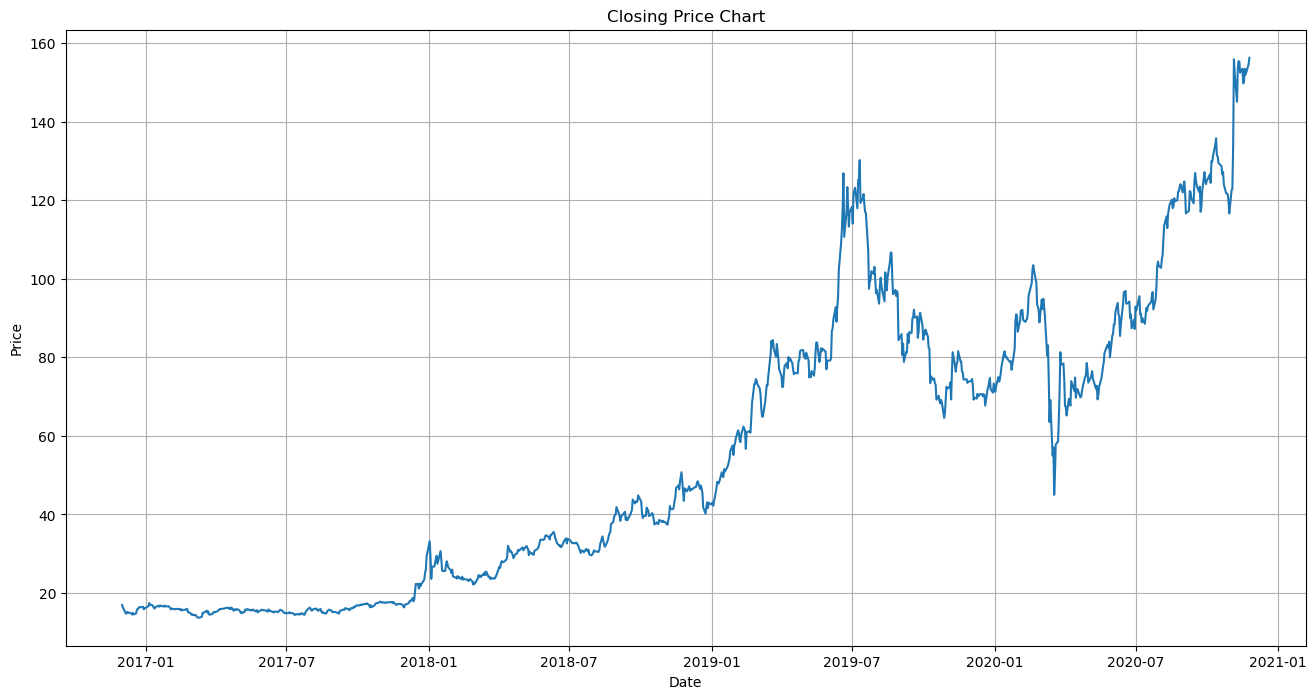

In [4]:
plt.figure(figsize=(16,8))
plt.plot(dataset['Adj Close'])
plt.title('Closing Price Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [5]:
monthly = dataset.asfreq('BM')
monthly['Returns'] = dataset['Adj Close'].pct_change().dropna()
monthly.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2016-12-30,17.760000,18.500,17.58,18.190001,16.085918,34800.0,0.016201
2017-01-31,18.799999,18.857,18.50,18.587999,16.437881,18100.0,-0.011382
2017-02-28,16.809999,16.882,16.40,16.510000,14.600249,40500.0,-0.022498
2017-03-31,17.270000,17.410,16.91,17.059999,15.086627,20800.0,-0.005248
2017-04-28,17.959999,18.000,17.50,18.000000,15.917898,25700.0,0.009535


In [6]:
monthly['Month_Name'] = monthly.index.strftime("%b")
monthly['Month_Name_Year'] = monthly.index.strftime("%b-%Y")

In [7]:
import calendar
import datetime

monthly = monthly.reset_index()
monthly['Month'] = monthly["Date"].dt.month

In [8]:
monthly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Month_Name,Month_Name_Year,Month
0,2016-12-30,17.760000,18.500,17.58,18.190001,16.085918,34800.0,0.016201,Dec,Dec-2016,12
1,2017-01-31,18.799999,18.857,18.50,18.587999,16.437881,18100.0,-0.011382,Jan,Jan-2017,1
2,2017-02-28,16.809999,16.882,16.40,16.510000,14.600249,40500.0,-0.022498,Feb,Feb-2017,2
3,2017-03-31,17.270000,17.410,16.91,17.059999,15.086627,20800.0,-0.005248,Mar,Mar-2017,3
4,2017-04-28,17.959999,18.000,17.50,18.000000,15.917898,25700.0,0.009535,Apr,Apr-2017,4


In [9]:
monthly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Month_Name,Month_Name_Year,Month
0,2016-12-30,17.760000,18.500,17.58,18.190001,16.085918,34800.0,0.016201,Dec,Dec-2016,12
1,2017-01-31,18.799999,18.857,18.50,18.587999,16.437881,18100.0,-0.011382,Jan,Jan-2017,1
2,2017-02-28,16.809999,16.882,16.40,16.510000,14.600249,40500.0,-0.022498,Feb,Feb-2017,2
3,2017-03-31,17.270000,17.410,16.91,17.059999,15.086627,20800.0,-0.005248,Mar,Mar-2017,3
4,2017-04-28,17.959999,18.000,17.50,18.000000,15.917898,25700.0,0.009535,Apr,Apr-2017,4


In [10]:
monthly.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Month_Name,Month_Name_Year,Month
42,2020-06-30,85.750000,88.589996,85.400002,88.019997,87.217316,1960800.0,-0.026543,Jun,Jun-2020,6
43,2020-07-31,105.480003,105.974998,101.779999,104.230003,103.279503,262800.0,-0.010349,Jul,Jul-2020,7
44,2020-08-31,125.000000,125.071999,122.250000,123.089996,121.967506,331600.0,-0.016932,Aug,Aug-2020,8
45,2020-09-30,125.660004,126.894997,122.150002,124.110001,124.110001,394900.0,-0.005130,Sep,Sep-2020,9
46,2020-10-30,119.730003,119.730003,112.250000,116.629997,116.629997,608400.0,-0.027516,Oct,Oct-2020,10


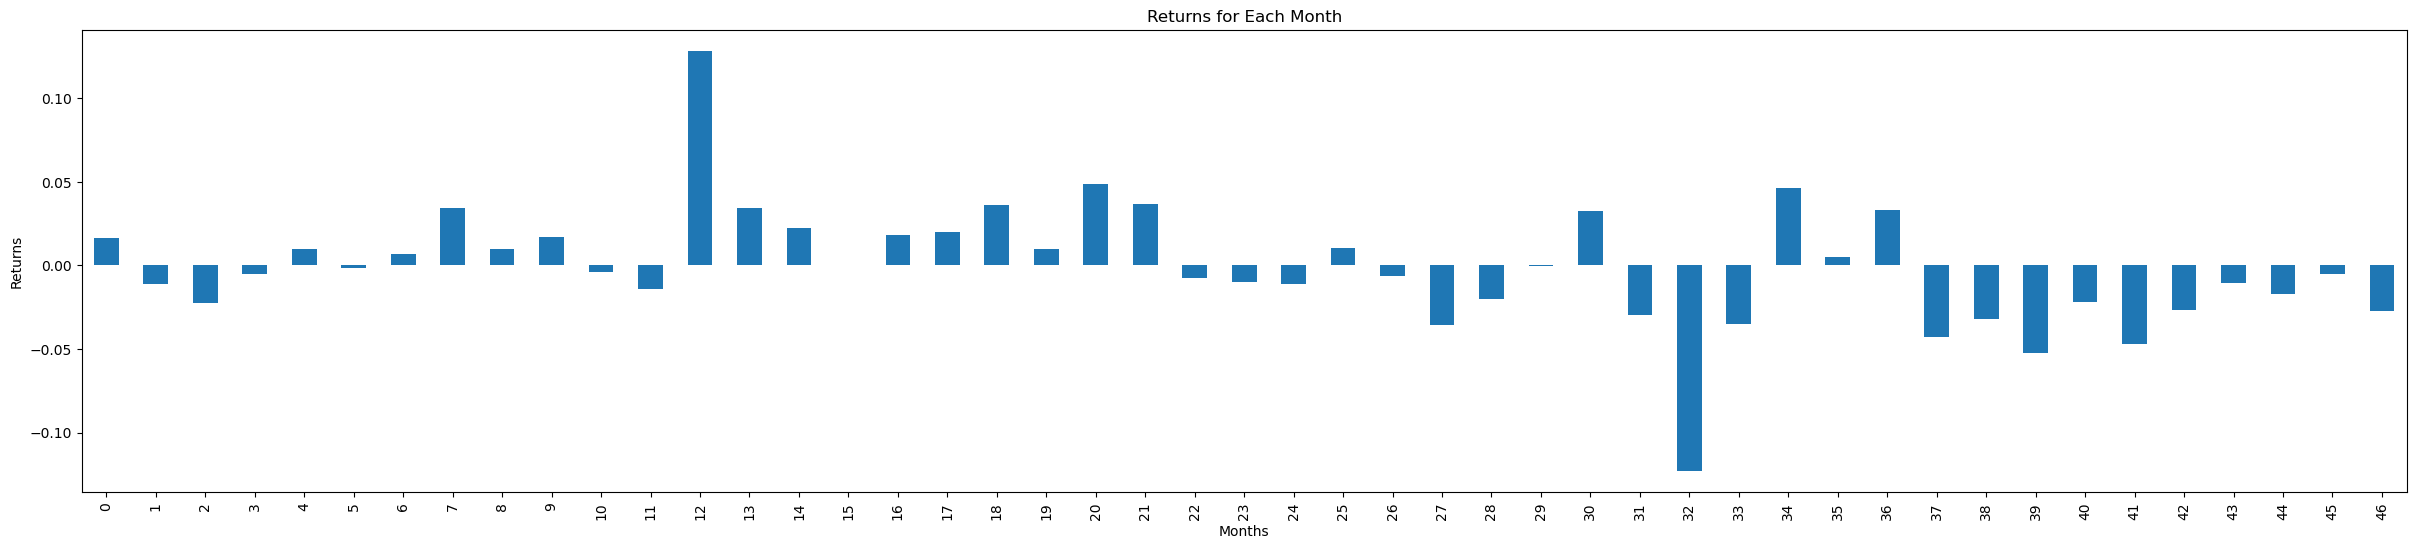

In [11]:
monthly['Returns'].plot(kind='bar', figsize=(30,6))
plt.xlabel("Months")
plt.ylabel("Returns")
plt.title("Returns for Each Month")
plt.show()

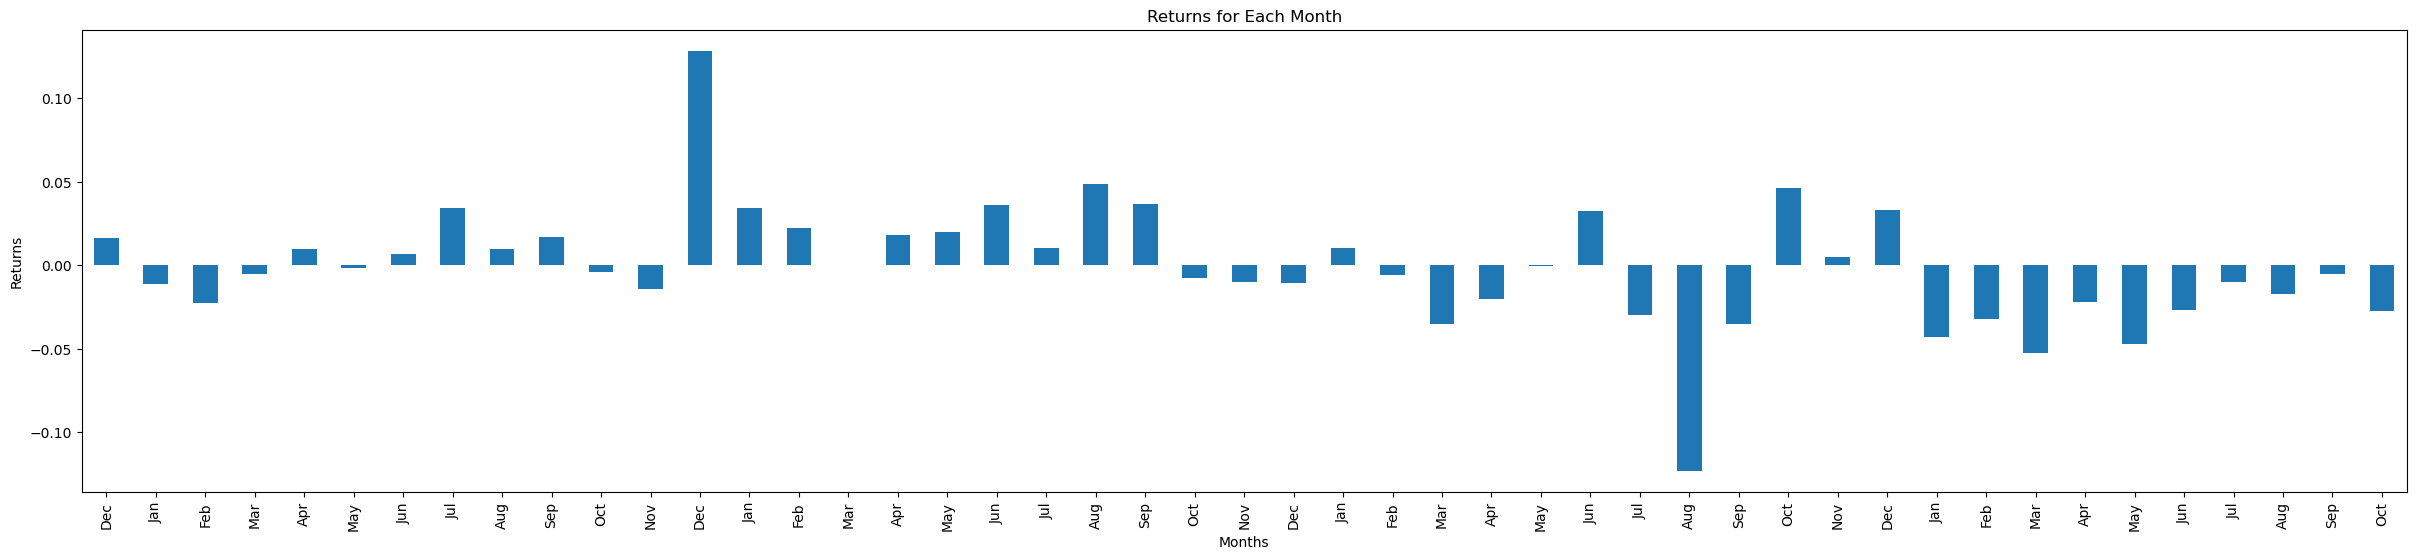

In [12]:
monthly['Returns'].plot(kind='bar', figsize=(30,6))
plt.xlabel("Months")
plt.ylabel("Returns")
plt.title("Returns for Each Month")
plt.xticks(monthly.index, monthly['Month_Name'])
plt.show()

In [13]:
from matplotlib import dates as mdates
import datetime as dt

monthly['ReturnsPositive'] = 0 < monthly['Returns']
monthly['Date'] = pd.to_datetime(monthly['Date'])
monthly['Date'] = monthly['Date'].apply(mdates.date2num)

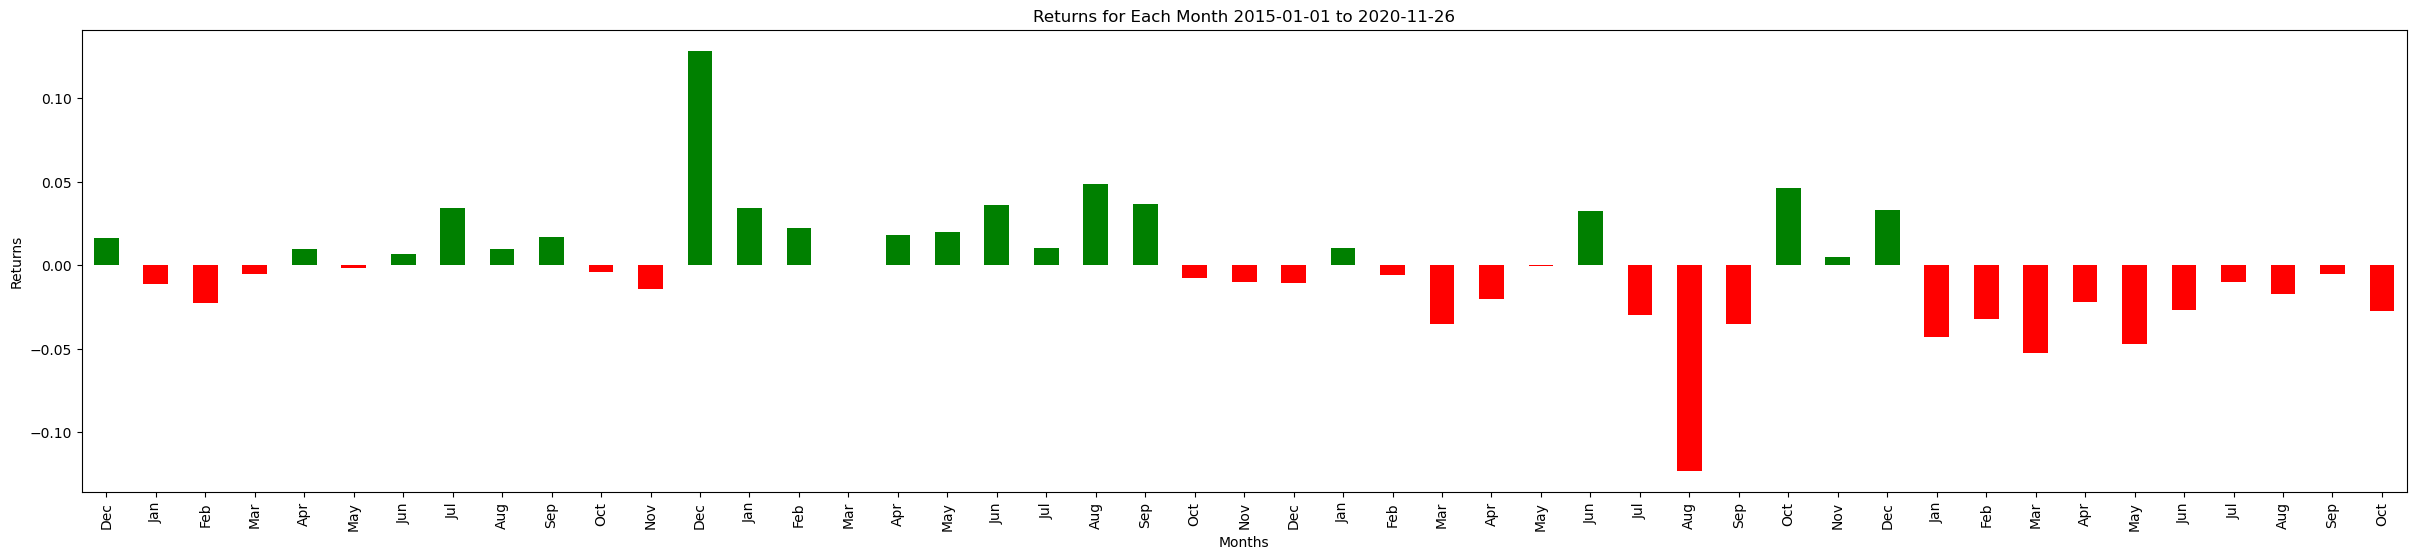

In [14]:
colors = monthly.ReturnsPositive.map({True: 'g', False: 'r'})
monthly['Returns'].plot(kind='bar', color = colors, figsize=(30,6))
plt.xlabel("Months")
plt.ylabel("Returns")
plt.title("Returns for Each Month " + start + ' to ' + end)
plt.xticks(monthly.index, monthly['Month_Name'])
plt.show()

In [15]:
yearly = dataset.asfreq('BY')
yearly['Returns'] = dataset['Adj Close'].pct_change().dropna()

In [16]:
yearly

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2016-12-30,17.76,18.500000,17.580000,18.190001,16.085918,34800,0.016201
2017-12-29,29.25,32.519001,29.100000,32.310001,29.325338,333400,0.128143
2018-12-31,46.16,46.208000,44.837002,45.389999,42.526997,186500,-0.010895
2019-12-31,73.25,78.089996,73.250000,75.870003,73.365639,525100,0.033088


In [17]:
yearly = yearly.reset_index()

In [18]:
yearly

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
0,2016-12-30,17.76,18.500000,17.580000,18.190001,16.085918,34800,0.016201
1,2017-12-29,29.25,32.519001,29.100000,32.310001,29.325338,333400,0.128143
2,2018-12-31,46.16,46.208000,44.837002,45.389999,42.526997,186500,-0.010895
3,2019-12-31,73.25,78.089996,73.250000,75.870003,73.365639,525100,0.033088


In [19]:
yearly['Years'] = yearly['Date'].dt.year

In [20]:
yearly

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Years
0,2016-12-30,17.76,18.500000,17.580000,18.190001,16.085918,34800,0.016201,2016
1,2017-12-29,29.25,32.519001,29.100000,32.310001,29.325338,333400,0.128143,2017
2,2018-12-31,46.16,46.208000,44.837002,45.389999,42.526997,186500,-0.010895,2018
3,2019-12-31,73.25,78.089996,73.250000,75.870003,73.365639,525100,0.033088,2019


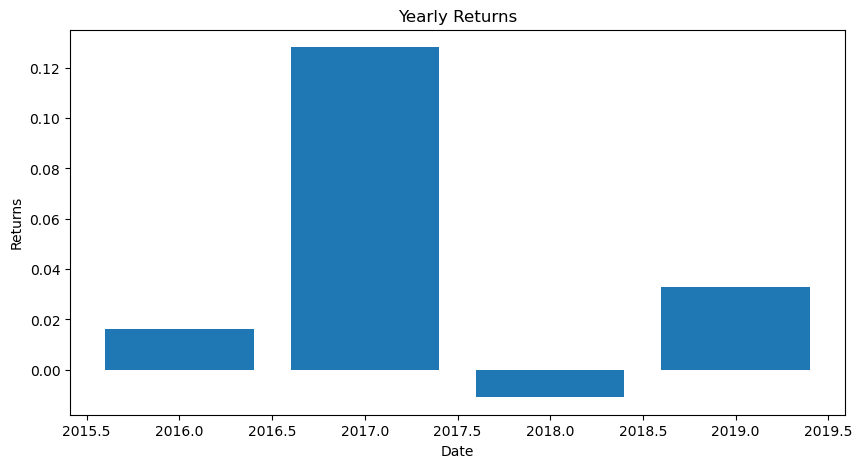

In [21]:
plt.figure(figsize=(10,5))
plt.bar(yearly['Years'], yearly['Returns'], align='center')
plt.title('Yearly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

In [22]:
from matplotlib import dates as mdates
import datetime as dt

yearly['ReturnsPositive'] = 0 < yearly['Returns']
yearly['Date'] = pd.to_datetime(yearly['Date'])
yearly['Date'] = yearly['Date'].apply(mdates.date2num)

In [23]:
yearly

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Years,ReturnsPositive
0,736328.0,17.76,18.500000,17.580000,18.190001,16.085918,34800,0.016201,2016,True
1,736692.0,29.25,32.519001,29.100000,32.310001,29.325338,333400,0.128143,2017,True
2,737059.0,46.16,46.208000,44.837002,45.389999,42.526997,186500,-0.010895,2018,False
3,737424.0,73.25,78.089996,73.250000,75.870003,73.365639,525100,0.033088,2019,True


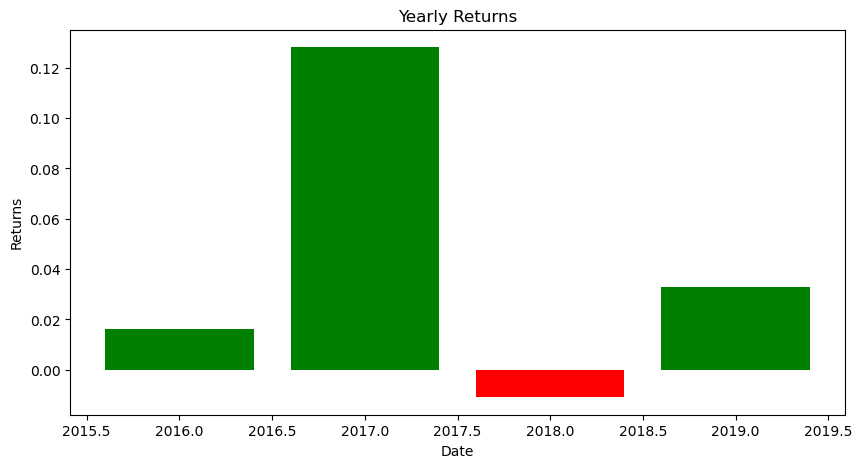

In [24]:
colors = yearly.ReturnsPositive.map({True: 'g', False: 'r'})
plt.figure(figsize=(10,5))
plt.bar(yearly['Years'], yearly['Returns'], color=colors, align='center')
plt.title('Yearly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

In [25]:
dataset['Returns'] = dataset['Adj Close'].pct_change().dropna()

In [26]:
yearly_returns_avg = dataset['Returns'].groupby([dataset.index.year]).mean()

In [27]:
yearly_returns_avg

Date
2016   -0.002165
2017    0.002653
2018    0.002126
2019    0.002819
2020    0.004255
Name: Returns, dtype: float64

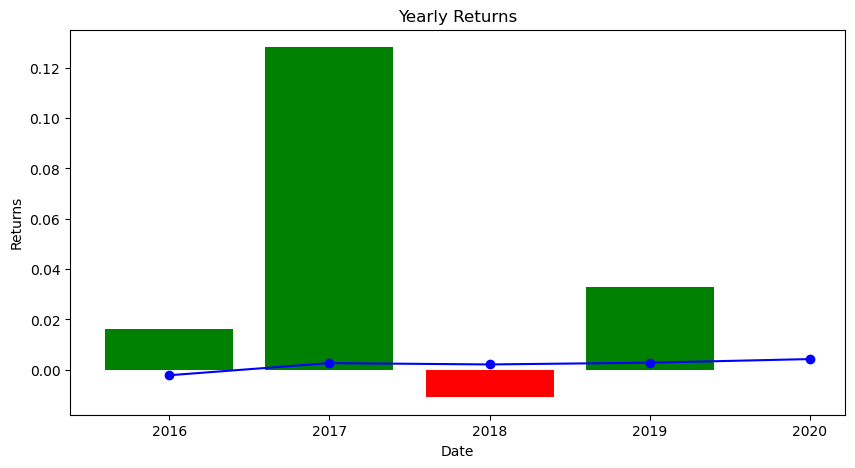

In [28]:
colors = yearly.ReturnsPositive.map({True: 'g', False: 'r'})
plt.figure(figsize=(10,5))
plt.bar(yearly['Years'], yearly['Returns'], color=colors, align='center')
plt.plot(yearly_returns_avg, marker='o', color='b')
plt.title('Yearly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()